# STAT 201 Group 43 - Group Project Proposal

## Title: Determining whether a mutant strain of the nematode C. elegans slows its rate of locomotion when in the presence of nutrients

In [8]:
# Please run this cell before continuing, installing packages if necessary.
library(tidyverse)
library(RColorBrewer)
library(tidymodels)
set.seed(2023)
options(repr.plot.width = 14, repr.plot.height = 8)

## Introduction

[placeholder]

## Preliminary results

In [9]:
# Load dataset
worm_data_raw <- read_csv('N2_CB1112_baseline_output_12_11_2022.csv', show_col_types = FALSE)

head(worm_data_raw)
nrow(worm_data_raw)

time_bin,worm,time,speed,x,y,angularspeed,pathlength,kink,bias,curve,dir,crab,length,midline,width,morphwidth,area,Strain
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5,27,4.707,0.2312,23.73,29.97,10.880,0.07470,57.80,1,42.10,0,0.02003,0.7560,0.9690,0.2386,0.0867,0.0871,N2_Food
5,156,4.484,0.2195,36.94,25.75,7.300,0.13040,34.50,1,31.17,0,0.02087,0.9320,1.0360,0.1998,0.1648,0.1556,N2_Food
5,185,4.715,0.2563,25.62,24.98,34.660,0.08360,38.50,1,30.64,0,0.02118,0.7200,0.9310,0.2660,0.1404,0.1324,N2_Food
5,192,4.600,0.1354,28.47,19.23,5.484,0.06230,28.60,1,26.06,0,0.00981,0.5806,0.8200,0.1979,0.1378,0.1079,N2_Food
5,198,4.715,0.1797,24.28,30.77,3.680,0.05940,48.56,1,35.38,0,0.01484,0.7950,0.9263,0.1696,0.1467,0.1315,N2_Food
5,208,4.824,0.2135,27.83,25.23,5.035,0.05133,51.94,1,34.78,0,0.00853,0.8657,0.9717,0.2160,0.1774,0.1526,N2_Food


[1] 252756

In [10]:
#Select worm, speed, Strain column
#Filter observations with Strain "CB1112_Food" and "CB1112_NoFood"
#Calculate average speed of each worm
worm_data_cleaned <- worm_data_raw |>
select(worm, speed, Strain) |>
filter(Strain %in% c("CB1112_Food", "CB1112_NoFood")) |>
group_by(Strain, worm) |>
summarize(speed = mean(speed))

head(worm_data_cleaned)
nrow(worm_data_cleaned)

`summarise()` has grouped output by 'Strain'. You can override using the
`.groups` argument.


Strain,worm,speed
<chr>,<dbl>,<dbl>
CB1112_Food,1,0.2243345
CB1112_Food,2,0.1039276
CB1112_Food,3,0.1803790
CB1112_Food,4,0.2429433
CB1112_Food,6,0.2389154
CB1112_Food,7,0.1302114


[1] 932

In [16]:
#Rename the column "Strain" as "food_status"
colnames(worm_data_cleaned)[1]  <- "food_status"

#Change "CB1112_Food" to "Food", "CB1112_NoFood" to "NoFood"
worm_data_cleaned$food_status[worm_data_cleaned$food_status=="CB1112_Food"] <- "Food"
worm_data_cleaned$food_status[worm_data_cleaned$food_status=="CB1112_NoFood"] <- "NoFood"

head(worm_data_cleaned)
nrow(worm_data_cleaned)
d1<- worm_data_cleaned %>% filter(food_status == "Food")
nrow(d1)
d2<- worm_data_cleaned %>% filter(food_status == "NoFood")
nrow(d2)

food_status,worm,speed
<chr>,<dbl>,<dbl>
Food,1,0.2243345
Food,2,0.1039276
Food,3,0.1803790
Food,4,0.2429433
Food,6,0.2389154
Food,7,0.1302114


[1] 932

[1] 521

[1] 411

#### Table 1. Mean, Standard Deviation, Number of Observations Across Food and Nofood Groups

In [12]:
# Create Table 1
summary <- worm_data_cleaned |>
group_by(food_status) |>
summarize(mean = mean(speed),
          median = median(speed),
          sd = sd(speed),
          n=n())
summary

food_status,mean,median,sd,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
Food,0.1799004,0.1842810,0.04499372,521
NoFood,0.2018251,0.2052696,0.04383005,411


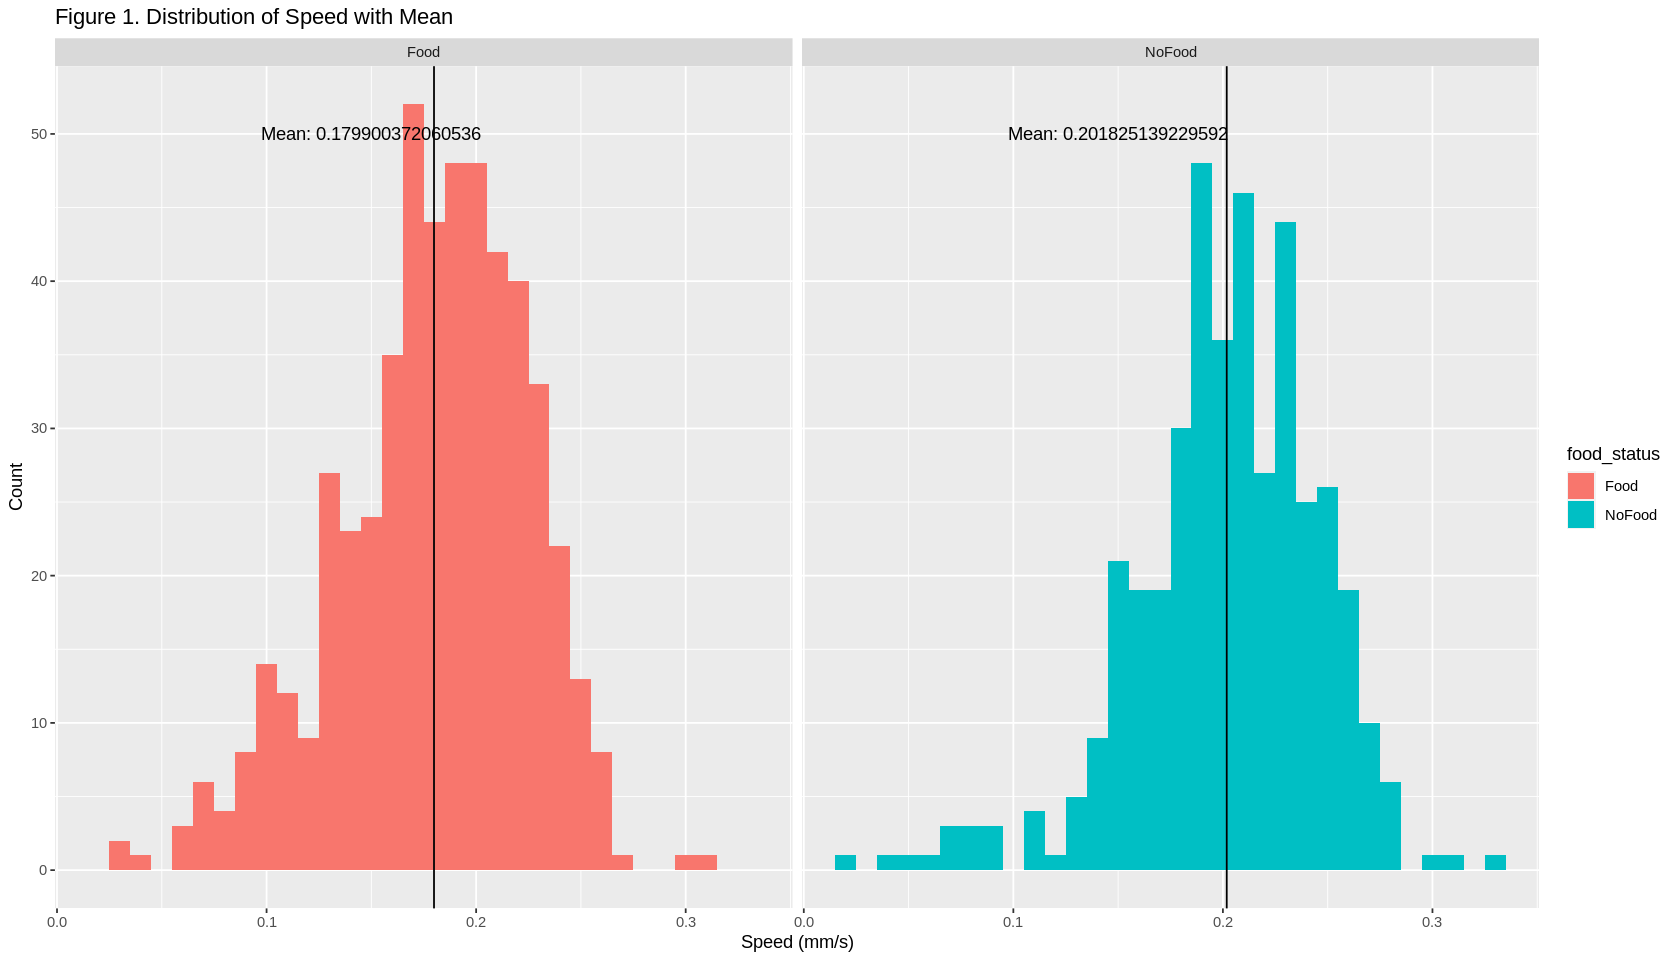

In [13]:
#Create histogram
hist <- worm_data_cleaned |>
ggplot(aes(x=speed, fill=food_status)) +
geom_histogram(binwidth=0.01) +
geom_vline(data = tibble(food_status=c("Food", "NoFood"), sample_mean=summary$mean), 
           aes(xintercept = sample_mean)) +
geom_text(data = tibble(food_status=c("Food", "NoFood"), sample_mean=summary$mean),
       mapping = aes(x = 0.15, y = 50, label=paste("Mean:", sample_mean))) +
facet_wrap(~food_status) +
labs(x="Speed (mm/s)",
     y="Count",
     title = "Figure 1. Distribution of Speed with Mean")

hist

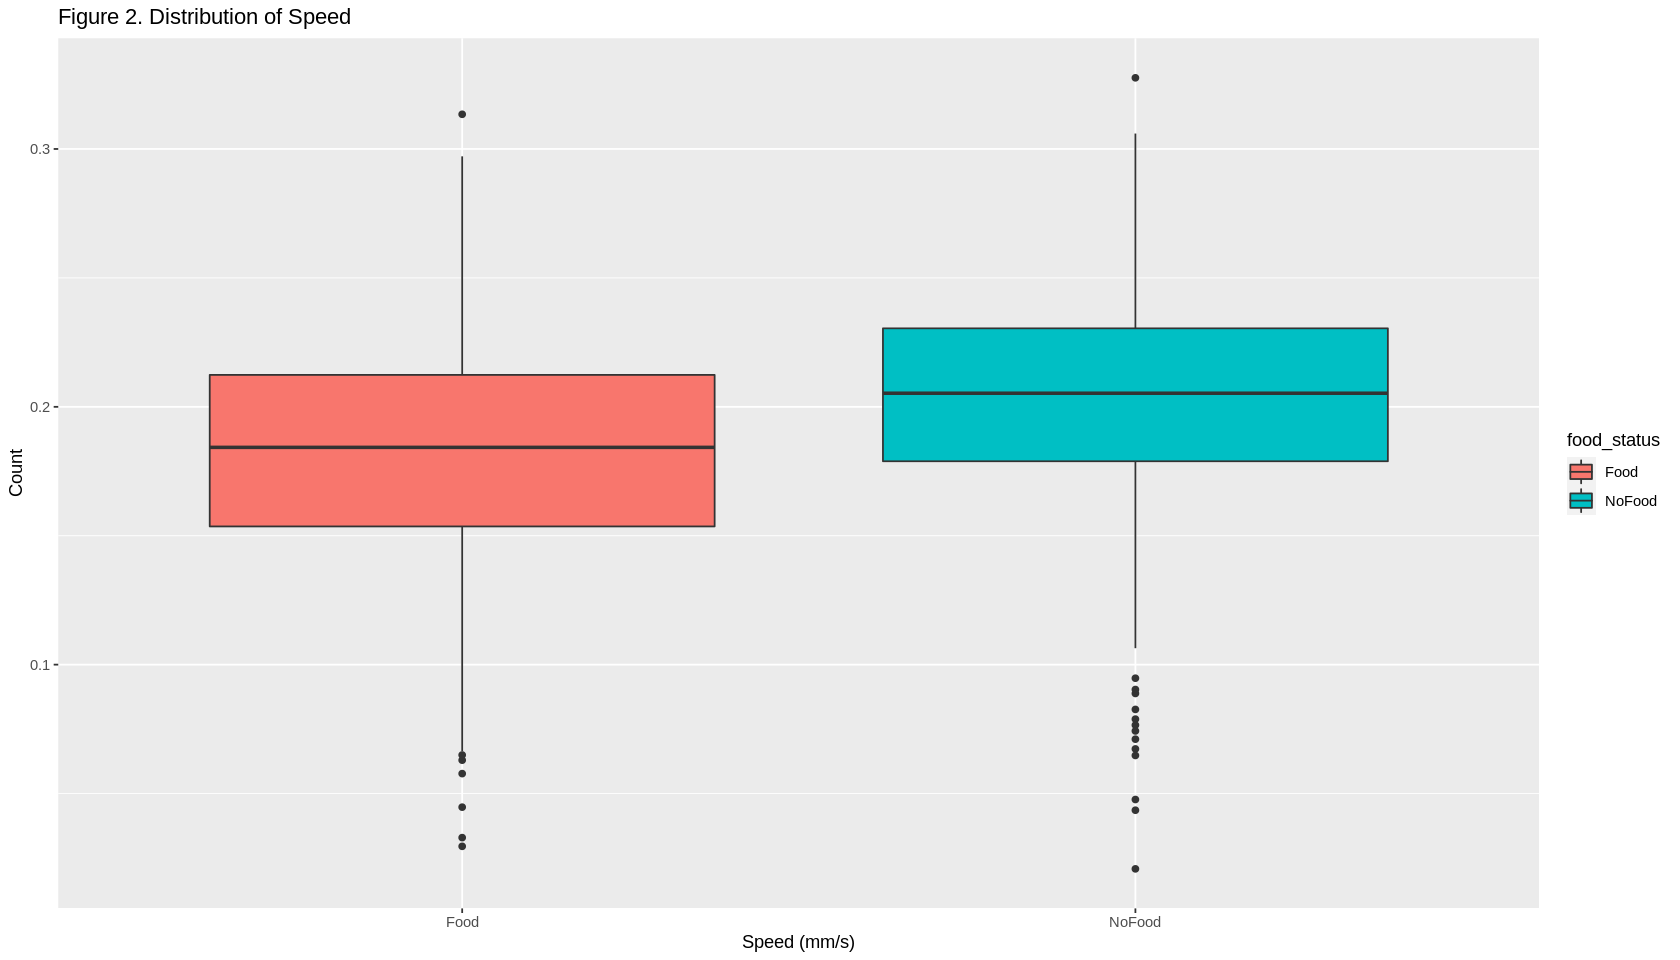

In [14]:
#Create boxplot
boxplot <- worm_data_cleaned |>
ggplot() +
geom_boxplot(aes(food_status, speed, fill = food_status)) +
labs(x="Speed (mm/s)",
     y="Count",
     title = "Figure 2. Distribution of Speed")

boxplot

## Methods: Plan

## Methods: Plan

**Trustworthiness**
* Ben(dataset provider) had done around 12 experiments researching on the behaviours of different mutated C. elegans. In each experiment, himself took the responsibility of obtaining the experiment results and transfering C. elegans.
* As the souce of our dataset, the experiment was operated in a strict experimental environment that maintains external factors such as temperature and humidity the same all the time.
* This experiment was opereated at Rankin lab in UBC and it was supervised by Dr.Catharine Rankin who runs this lab. Due to the supervision of Dr.Rankin, this experiment was finished precisely.

**Some imperfection of plots & Estimates**
* We can observe from the side by side boxplot that the dataset contains too many outliers, as it will affect the visualization and more importantly it might indicate inaccurate mean values in our graph.
* We can use hypothesis test to compare the mean of two sample groups, so that its results is more realiable and convictive.

**Hypothesis Test**

$H_0:$ The mean speed(rate of locomotion) of CB1112 worms on food is equal to the mean speed of CB1112 worms with no food.

$H_1:$ The mean speed(rate of locomotion) of CB1112 worms on food is ***NOT*** equal to the mean speed of CB1112 worms with no food.

We plan to do a two sample t-test for our hypothesis test. Individuals in our two sample groups are selected independently in each population. Also, our sample size is large enough (521 individuals oin *"Food"* group and 411 individuals in *NoFood* group) which indicates that we are qualified to use CLT. 

In order to get the confidence interval, we can either compute manually ( $(\bar{x}_{1} - \bar{x}_{2}) \pm t * se(\bar{x}_{1} - \bar{x}_{2})$ ) or we can directly use *t.test* function in R to compute the condidence interval

**What do you expected to find?**
* We expected to find weak relationship between food supply variant and the speed of CB1112.
* We expected to find no big difference between the mean speed of CB1112 worms in food and the mean speed of CB1112 worms with no food.
* We expected to fail to reject our null hypothesis.

**What impact could such findings have?**
* By comparing the behavioural and morphological profiles of C. elegans strains carrying loss-of-function mutations in orthologs of PD-associated genes, it is possible to help characterize the roles their human equivalents may play in PD and how they might interact with one another. Such finding might set another powerful building block on the road to treating Parkinson's disease.

**Future questions this could lead to**
* How does the slowing behaviour of C. elegans related to the loss-function mutation in human genes that could cause Parkinson's disease?
* What kind of mutation to human genes has significant potential to slower the loss of dopamine?
* If the mutation experiment of C. elegans succeeded, does this indicated we can 100% cure Parkinson's disease?

## References

[placeholder]